### Scikit-Optimize (scopt) distributions


The stochastic expressions currently recognized by scopt's optimization algorithms are:

*space.Integer(low, high, transform=None, name=None)*
- Search space dimension that can take on integer values.
- Parameters
    - low [int]: Lower bound (inclusive).
    - high [int]: Upper bound (inclusive).
    - transform ["identity", "normalize", optional]: The following transformations are supported.
        - "identity", (default) the transformed space is the same as the original space. 
        - "normalize", the transformed space is scaled to be between 0 and 1. 
    - name [str or None]: Name associated with dimension, e.g., "number of trees".

<BR>

*space.Real(low, high, prior='uniform', transform=None, name=None)*
- Search space dimension that can take on any real value.
- Parameters
    - low [float]: Lower bound (inclusive).
    - high [float]: Upper bound (inclusive).
    - prior ["uniform" or "log-uniform", default="uniform"]: Distribution to use when sampling random points for this dimension.
        - If "uniform", points are sampled uniformly between the lower and upper bounds.
        - If "log-uniform", points are sampled uniformly between log10(lower) and log10(upper).`
    - transform ["identity", "normalize", optional]: The following transformations are supported.
        - "identity", (default) the transformed space is the same as the original space.
        - "normalize", the transformed space is scaled to be between 0 and 1.
    - name [str or None]: Name associated with the dimension, e.g., "learning rate".

<BR>
    
*space.Categorical(categories, prior=None, transform=None, name=None)*
- Search space dimension that can take on categorical values.
- Parameters
    - categories [list, shape=(n_categories,)]: Sequence of possible categories.
    - prior [list, shape=(categories,), default=None]: Prior probabilities for each category. By default all categories are equally likely.
    - transform ["onehot", "identity", default="onehot"] :
        - "identity", the transformed space is the same as the original space.
        - "onehot", the transformed space is a one-hot encoded representation of the original space.
    - name [str or None]: Name associated with dimension, e.g., "colors".

### Visualising the data distribution API

In [25]:
from skopt.space import Real, Categorical, Integer

In [29]:
import matplotlib.pyplot as plt

def plot_samples(samples, bins):
    plt.hist(samples, bins = bins, edgecolor = 'black'); 
    plt.xlabel('x'); plt.ylabel('Frequency'); plt.title('Domain Space');

#### Integer

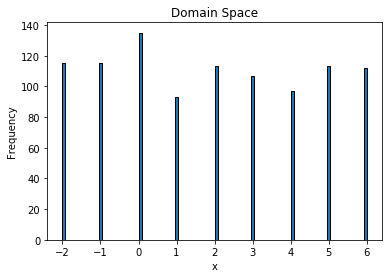

In [42]:
# Create the domain space
space = Integer(-2, 6, name='x')

samples = space.rvs(n_samples=1000)
plot_samples(samples, 100)

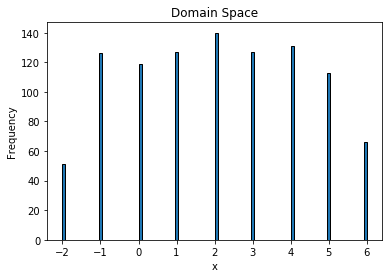

In [49]:
space = Integer(-2, 6, name='x', transform='normalize')

samples = space.rvs(n_samples=1000)
plot_samples(samples, 100)

#### Real

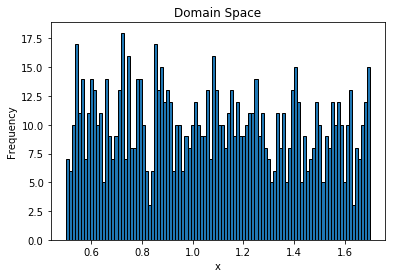

In [52]:
space = Real(0.5, 1.7, name='x', prior='uniform')

samples = space.rvs(n_samples=1000)
plot_samples(samples, 100)

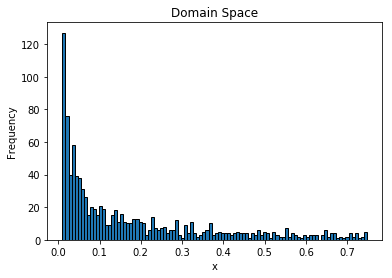

In [64]:
space = Real(0.01, 0.75, name='x', prior='log-uniform')

samples = space.rvs(n_samples=1000)
plot_samples(samples, 100)

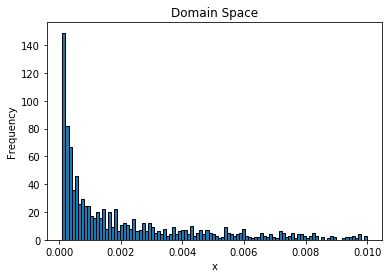

In [66]:
space = Real(10**-4, 10**-2, name='x',  prior='log-uniform')

samples = space.rvs(n_samples=1000)
plot_samples(samples, 100)

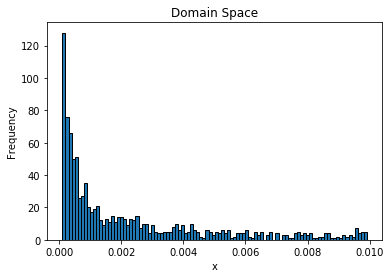

In [67]:
space = Real(10**-4, 10**-2, name='x',  prior='log-uniform', transform='normalize')

samples = space.rvs(n_samples=1000)
plot_samples(samples, 100)

#### Categorical
Note: No options for having nested search spaces.

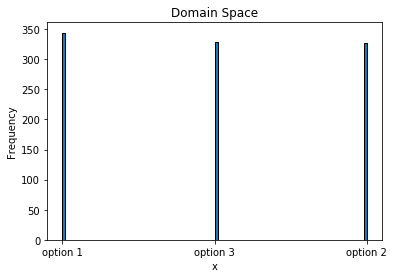

In [72]:
space = Categorical(['option 1', 'option 2', 'option 3'], name='x', prior=None, transform=None)

samples = space.rvs(n_samples=1000)
plot_samples(samples, 100)

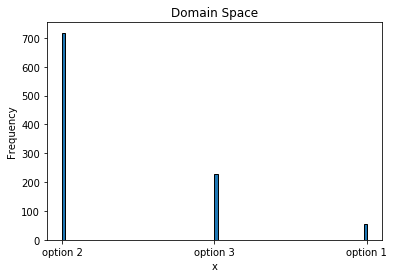

In [74]:
space = Categorical(['option 1', 'option 2', 'option 3'], name='x', prior=[0.05, 0.7, 0.25], transform=None)

samples = space.rvs(n_samples=1000)
plot_samples(samples, 100)

In [109]:
options = ['option 1', 'option 2', 'option 3']
space = Categorical(options, name='x', prior=None, transform='identity')

trans = space.transform(options)
print('Identity transform:')
print('input={}'.format(options))
print('output={}'.format(trans))

Identity transform:
input=['option 1', 'option 2', 'option 3']
output=['option 1', 'option 2', 'option 3']


In [108]:
options = ['option 1', 'option 2', 'option 3']
space = Categorical(options, name='x', prior=None, transform='onehot')

trans = space.transform(options)
print('Onehot transform:')
print('input={}'.format(options))
print('output={}'.format(trans))

Onehot transform:
input=['option 1', 'option 2', 'option 3']
output=[[1 0 0]
 [0 1 0]
 [0 0 1]]


### The Objective function

Now time to introduce the objective function that you want to minimize. For our objective function, we will use a simple polynomial function with the goal being to find the minimu value. This function has one global minimum over the range we define it as well as one local minimum. 
<BR>

When we define the objective function, we must make sure it returns a single real-value number to minimize. If we use a metric such as accuracy, then we would have to return the negative of accuracy to tell our model to find a better accuracy! We can also return a dictionary (we will see this later) where one of the keys must be "loss".

In [150]:
import numpy as np

def objective(x):
    """Objective function to minimize"""
    
    # Create the polynomial object
    f = np.poly1d([1, -2, -25, 32, 7, -2, -200])
    # Return the value of the polynomial
    return f(x) * 0.05

Minimum of -139.6120 occurs at 4.5380


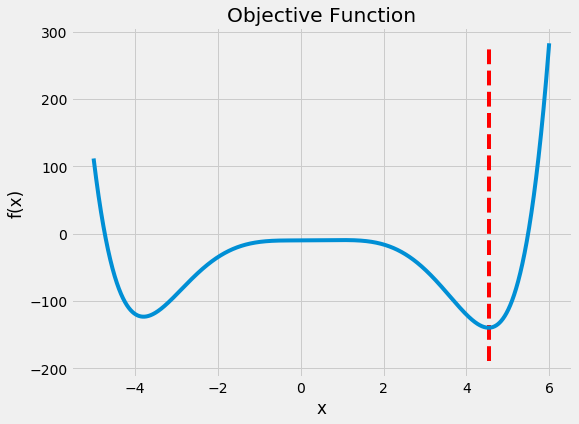

In [151]:
# Space over which to evluate the function is -5 to 6
x = np.linspace(-5, 6, 10000)
y = objective(x)

miny = min(y)
minx = x[np.argmin(y)]

# Visualize the function
plt.figure(figsize = (8, 6))
plt.style.use('fivethirtyeight')
plt.title('Objective Function'); plt.xlabel('x'); plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 50, max(y), linestyles = '--', colors = 'r')
plt.plot(x, y);

# Print out the minimum of the function and value
print('Minimum of %0.4f occurs at %0.4f' % (miny, minx))